In [20]:
import pymongo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
client = pymongo.MongoClient('localhost', 27017)
db = client["project"]
collection = db["project"]

In [22]:
cursor = collection.find({})
# for document in cursor:
#       print(document)

In [23]:
cursor = collection.find({})
data = pd.DataFrame(list(cursor))

In [24]:
data.head()

,_id,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount
0,65945f675261bd05d84b2a5d,LP001002,Male,No,0,Graduate,No,5849.0,0.0,360.0,1.0,Urban,Y,NaN
1,65945f675261bd05d84b2a5e,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,360.0,1.0,Rural,N,128.0
2,65945f675261bd05d84b2a5f,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,360.0,1.0,Urban,Y,66.0
3,65945f675261bd05d84b2a60,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,360.0,1.0,Urban,Y,120.0
4,65945f675261bd05d84b2a61,LP001008,Male,No,0,Graduate,No,6000.0,0.0,360.0,1.0,Urban,Y,141.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                615 non-null    object 
 1   Loan_ID            614 non-null    object 
 2   Gender             601 non-null    object 
 3   Married            611 non-null    object 
 4   Dependents         599 non-null    object 
 5   Education          614 non-null    object 
 6   Self_Employed      582 non-null    object 
 7   ApplicantIncome    614 non-null    float64
 8   CoapplicantIncome  614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  LoanAmount         592 non-null    float64
dtypes: float64(5), object(9)
memory usage: 67.4+ KB


In [26]:
data = data.drop(columns=['_id','Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


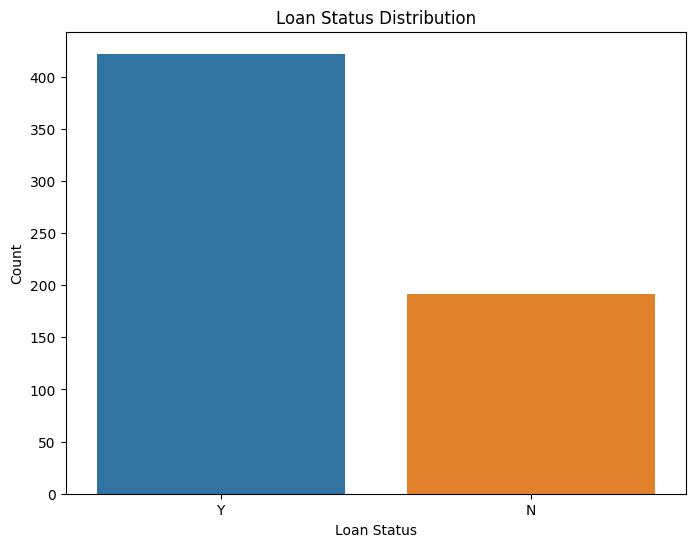

In [27]:
# visualize class distribution for the target variable i.e. Loan Status
plt.figure(figsize=(8,6))
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

ValueError: num must be an integer with 1 <= num <= 6, not 7

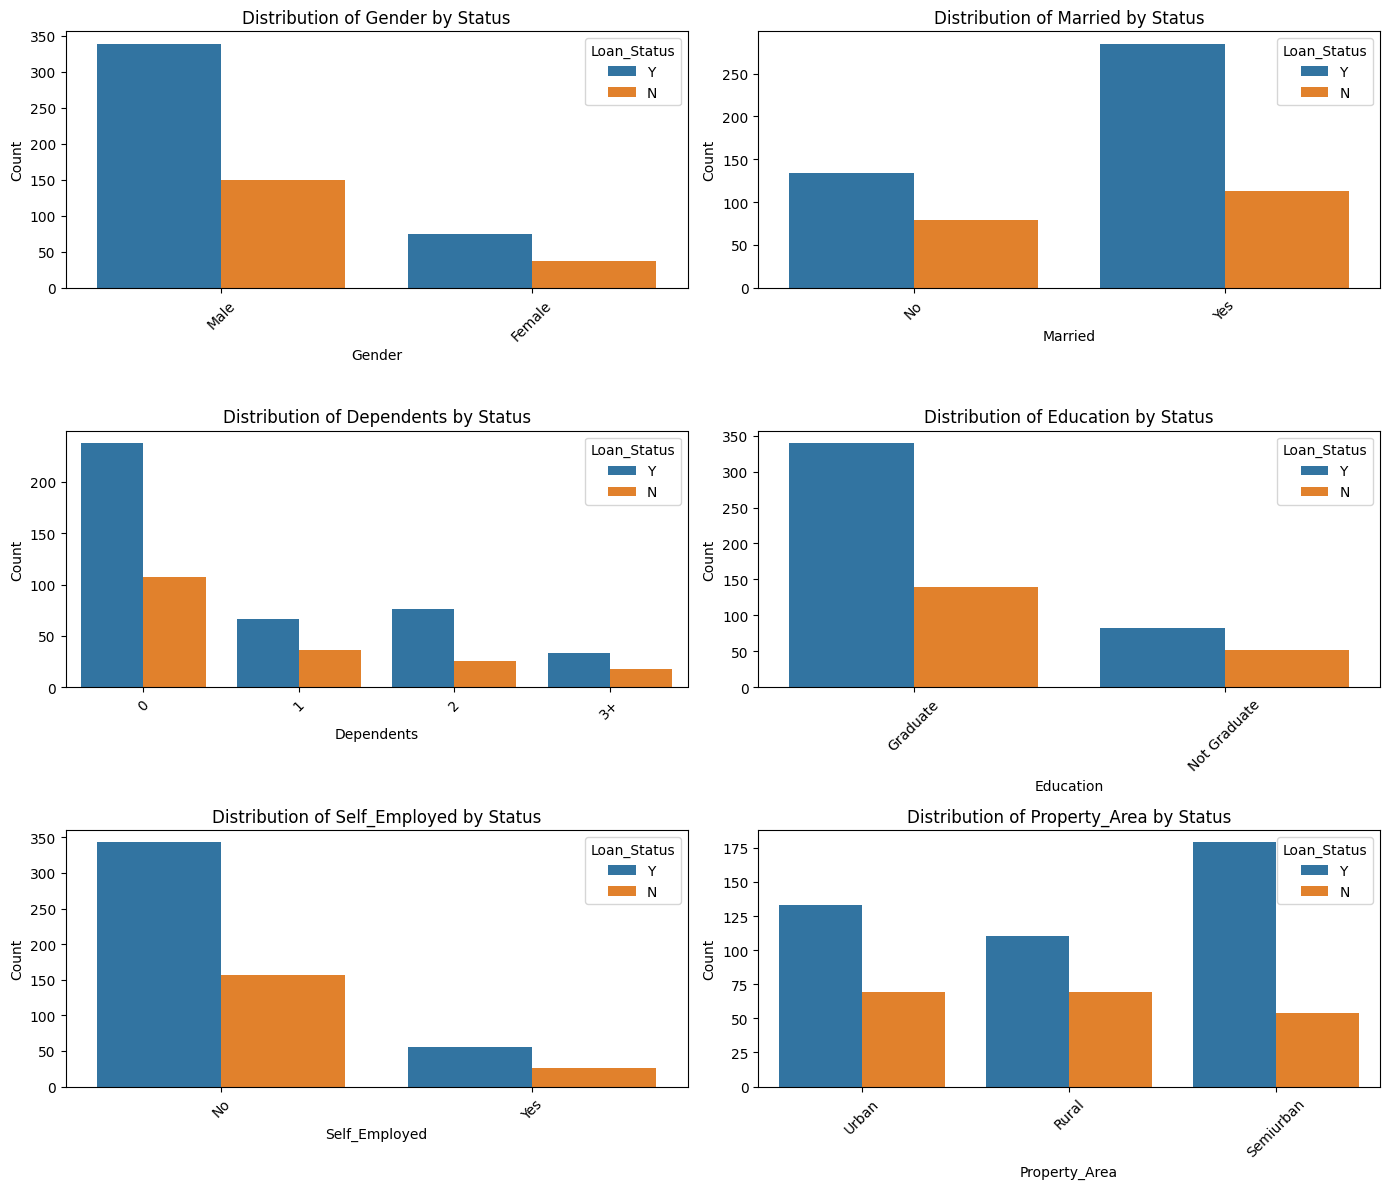

In [28]:
# Bar plotting for categorical values by Loan Status
plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue='Loan_Status', data=data)
    plt.title(f'Distribution of {col} by Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show

In [29]:
#### Encoding categrical Features: ##########
encoded_data = pd.get_dummies(data ,drop_first=True)
encoded_data.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.0,0.0,360.0,1.0,NaN,1,0,0,0,0,0,0,0,1,1
1,4583.0,1508.0,360.0,1.0,128.0,1,1,1,0,0,0,0,0,0,0
2,3000.0,0.0,360.0,1.0,66.0,1,1,0,0,0,0,1,0,1,1
3,2583.0,2358.0,360.0,1.0,120.0,1,1,0,0,0,1,0,0,1,1
4,6000.0,0.0,360.0,1.0,141.0,1,0,0,0,0,0,0,0,1,1


In [30]:
########## Split Features and Target Varible ############
X = encoded_data.drop(columns='Loan_Status_Y')
y = encoded_data['Loan_Status_Y']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)


In [32]:
print("Data types of X:")
print(X.dtypes)

print("\nData types of y:")
print(y.dtypes)

print("\nFeatures in X:")
print(X.columns)


Data types of X:
ApplicantIncome            float64
CoapplicantIncome          float64
Loan_Amount_Term           float64
Credit_History             float64
LoanAmount                 float64
Gender_Male                  uint8
Married_Yes                  uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Not Graduate       uint8
Self_Employed_Yes            uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

Data types of y:
uint8

Features in X:
Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'LoanAmount', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')


<Axes: xlabel='Decision Threshold', ylabel='Values'>

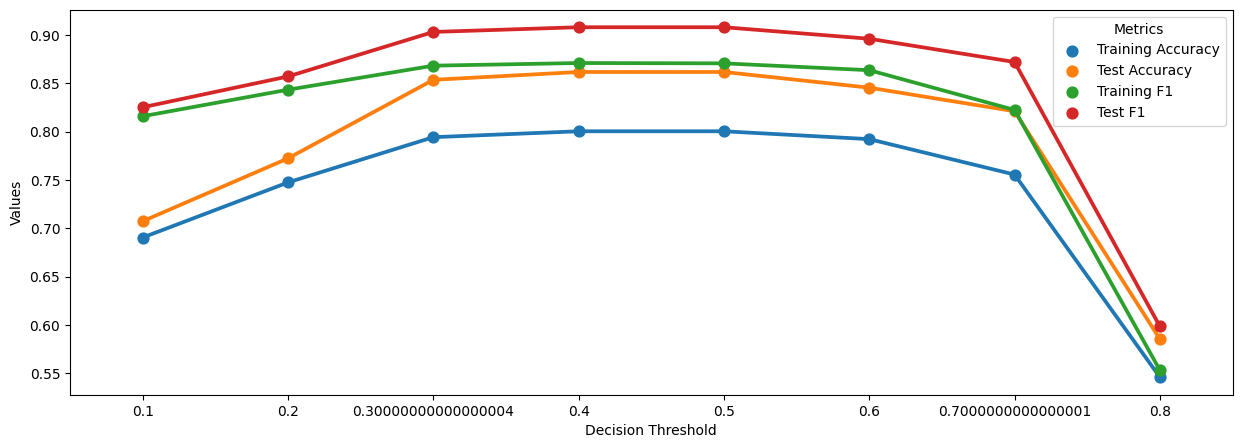

In [ ]:
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)

    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)

    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int)

    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)

    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)


Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [ ]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8617886178861789
Test F1 Score:  0.9081081081081082
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,22,16,38
1,1,84,85
All,23,100,123


In [ ]:
import pickle
from pymongo import MongoClient
from gridfs import GridFS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


# Serialize your best model
best_model = logreg_clf  # Assuming you've selected a model based on some criteria (e.g., best test F1 score)
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['project']
fs = GridFS(db)

# Store the serialized best model in MongoDB
with open('best_model.pkl', 'rb') as file:
    model_data = file.read()
    fs.put(model_data, filename='best_model.pkl')
